In [264]:
import requests
import pandas as pd
from datetime import datetime

In [265]:
API_KEY = 'kWelKbzApdVVMZhSAfZCaEXLcUCEevuh'  # Consider using environment variables for security
BASE_URL = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'

In [266]:
def fetch_noaa_data(endpoint, params):
    headers = {'token': API_KEY}
    response = requests.get(BASE_URL + endpoint, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return None

In [267]:
params = {
    'datasetid': 'GHCND',  # Global Historical Climatology Network - Daily dataset
    'stationid': 'GHCND:USW00094728',  # Example station ID for New York Central Park
    'startdate': '2022-01-01',
    'enddate': '2023-01-31',
    'limit': 1000,  # Adjust based on your needs
    'units': 'metric',
    'datatypeid': ['TMAX', 'TMIN'],  # Max and Min temperatures
}

data = fetch_noaa_data('data', params)

# Convert to DataFrame for analysis
if data:
    df = pd.DataFrame(data['results'])
    print(df.head())
    print(df.iloc[-1])
else:
    print("No data fetched.")

                  date datatype            station attributes  value
0  2022-01-01T00:00:00     TMAX  GHCND:USW00094728   ,,W,2400   13.3
1  2022-01-01T00:00:00     TMIN  GHCND:USW00094728   ,,W,2400   10.0
2  2022-01-02T00:00:00     TMAX  GHCND:USW00094728   ,,W,2400   15.0
3  2022-01-02T00:00:00     TMIN  GHCND:USW00094728   ,,W,2400    2.8
4  2022-01-03T00:00:00     TMAX  GHCND:USW00094728   ,,W,2400    2.8
date          2023-01-31T00:00:00
datatype                     TMIN
station         GHCND:USW00094728
attributes               ,,W,2400
value                        -0.5
Name: 791, dtype: object


In [268]:
print(df.dtypes)
# # Assuming 'data' is a list of daily records fetched by your original script
# df = pd.DataFrame(data['results'])

# # Convert the 'date' column to datetime format
# df['date'] = pd.to_datetime(df['date'])

# # Set 'date' as the DataFrame index
# df.set_index('date', inplace=True)

# # Resample the data to monthly frequency, aggregating the values by mean
# monthly_data = df.resample('M').mean()

# print(monthly_data.head())

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample to monthly frequency and calculate the mean of 'value' column
monthly_data = df['value'].resample('M').mean()

# Reset index to turn the date index back to a column
monthly_data = monthly_data.reset_index()

print(monthly_data.head())

date           object
datatype       object
station        object
attributes     object
value         float64
dtype: object
        date      value
0 2022-01-31  -0.879032
1 2022-02-28   2.998214
2 2022-03-31   7.400000
3 2022-04-30  11.526667
4 2022-05-31  17.793548


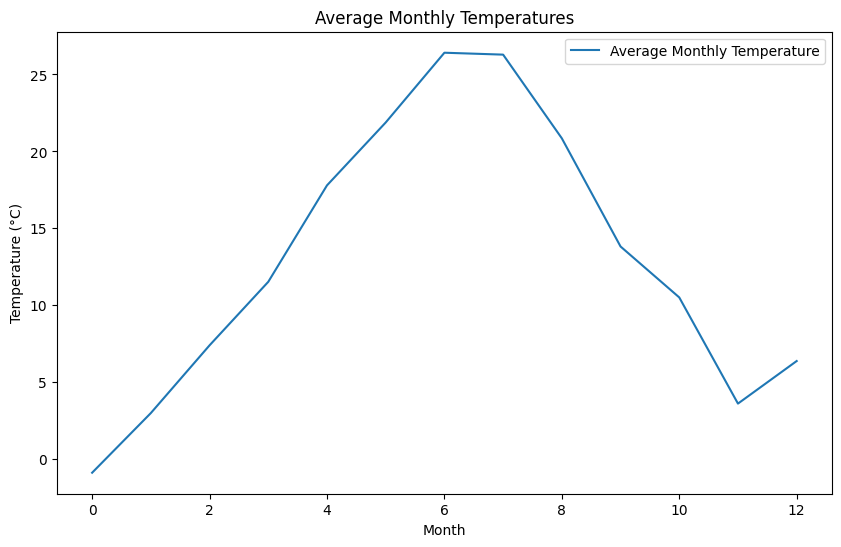

In [269]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['value'], label='Average Monthly Temperature')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()